In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import seaborn as sn

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
from PIL import Image
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

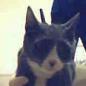

In [3]:
# check the full file path
with Image.open('data/CATS_DOGS/test/CAT/10107.jpg') as im:
    display(im)

In [4]:
path = "data/CATS_DOGS/"
img_names = []

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder + '/' + img)


In [5]:
len(img_names)

24994

In [6]:
img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)

    except:
        rejected.append(item)

In [9]:
print(len(img_sizes))
print(len(rejected))

24994
0


In [10]:
df = pd.DataFrame(img_sizes)

In [15]:
df[0].describe()

count    24994.000000
mean       404.493518
std        108.941802
min         42.000000
25%        323.000000
50%        448.000000
75%        500.000000
max        500.000000
Name: 0, dtype: float64

In [14]:
df[1].describe()

count    24994.000000
mean       361.037129
std         96.936811
min         33.000000
25%        302.000000
50%        375.000000
75%        421.000000
max        500.000000
Name: 1, dtype: float64

In [16]:
dog = Image.open('data/CATS_DOGS/train/DOG/14.jpg')

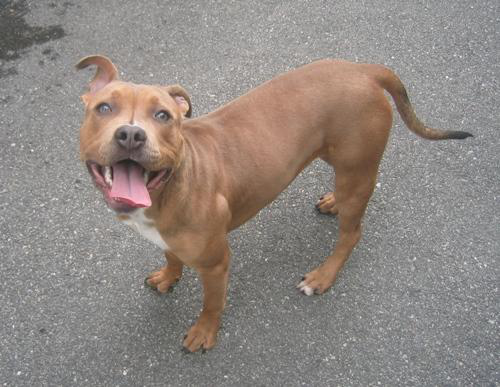

In [17]:
display(dog)

In [18]:
dog.size

(500, 387)

In [19]:
dog.getpixel((0,0))

(90, 95, 98)

In [20]:
transform = transforms.Compose([
    transforms.ToTensor()
])

im = transform(dog)
print(type(im))
print(im.shape)

<class 'torch.Tensor'>
torch.Size([3, 387, 500])


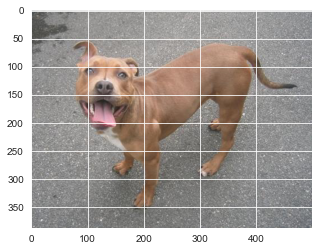

In [23]:
# (387,500,3)
# (1, 2, 0)
plt.imshow(np.transpose(im.numpy(), (1,2,0)))

In [25]:
im[:, 0, 0]

tensor([0.3529, 0.3725, 0.3843])

In [26]:
np.array((90, 95, 98)) / 255

array([0.35294118, 0.37254902, 0.38431373])

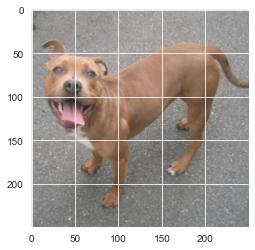

In [32]:
transform = transforms.Compose([
    transforms.Resize(250),
    transforms.CenterCrop(250),
    transforms.ToTensor()
])

im = transform(dog)

plt.imshow(np.transpose(im.numpy(), (1,2,0)))

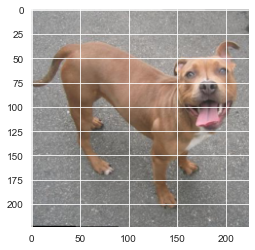

In [44]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1), # normally we'd set p=0.5
    transforms.RandomRotation(30),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

im = transform(dog)

plt.imshow(np.transpose(im.numpy(), (1,2,0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


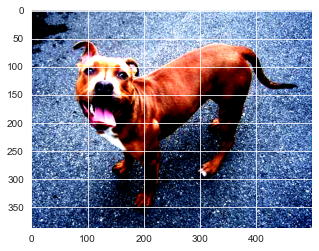

In [45]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

im = transform(dog)
plt.imshow(np.transpose(im.numpy(), (1,2,0)))

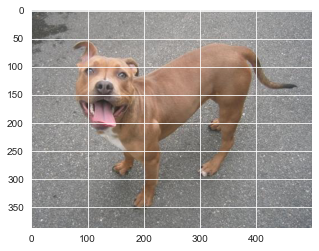

In [46]:
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));